# Machine Learning Workflow
<hr style="border:2px solid black">

Let's go through the machine learning workflow using a familiar dataset.

![penguins](penguins.png)

### The Workflow

<img src="ml_workflow.png" width=400 heigth=400></img>

<hr style="border:2px solid black">

## 1. Define (Business) Goal

A Goal should be measurable

**Penguins:**
> Predict which species a penguin belongs to<br>
> We want to achieve an accuracy of at least 0.8

**Titanic:**
> Predict who survived and who died<br>
> Arbitrarily: We want an accuracy of the model that is higher than 0.77

**Accuracy:** Ratio of correct predictions over all cases. What is the percentage of correctly classified cases.

**Loss:** Difference between y and y_hat


<hr style="border:2px solid black">

## 2. Get Data

For the penguins data and for the titanic data we just have to load a .csv file.


Potential data sources:
- Databases
- Create your own data (simulation) / run a survey
- Sensors / Devices that measure data
- Web scraping/API (Application Programming Interface)

**load packages**

In [76]:
# data analysis stack
import numpy as np
import pandas as pd

**read data**

In [77]:
df = pd.read_csv('../data/penguins_simple.csv', sep=';')
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE


In [78]:
df.shape

(333, 6)

<hr style="border:2px solid black">

## 3. Train-Validation-Test-Split

- We want to split our data set in data to train, to validate and to test:
    - Train data: the samples of data used to fit the model.
    - Validation data: the samples of data used to evaluate the model while fine-tuning the model hyperparameters
    - Test data: the samples of data used to evaluate the model
- The model should not see the test data until the end, when we use it to evaluate the performance of the model.

What is the purpose of splitting the data? - We want to be able to detect if our model is overfitting.
The splitting the data does not help to prevent overfitting but it helps to detect overfitting.

**Overfitting:**

Algorithm is to some extent memorizing the correct answers for the training data. This means that it will not work well on data it has not been trained on. The model does not **generalize** well.

### 3.1 Separate features and label (target)
- `X`:= is the array of features used to predict. It's a multidimensional array (or matrix, or a dataframe in pandas)
- `y`:= is the array of labels to be predicted. It's an array with a single dimension (or a vector, or a series in pandas)

In [79]:
df.sample(10)

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
149,Chinstrap,45.4,18.7,188.0,3525.0,FEMALE
239,Gentoo,46.1,15.1,215.0,5100.0,MALE
232,Gentoo,46.2,14.5,209.0,4800.0,FEMALE
226,Gentoo,45.5,13.7,214.0,4650.0,FEMALE
61,Adelie,41.1,19.1,188.0,4100.0,MALE
332,Gentoo,49.9,16.1,213.0,5400.0,MALE
256,Gentoo,49.6,15.0,216.0,4750.0,MALE
62,Adelie,35.9,16.6,190.0,3050.0,FEMALE
37,Adelie,36.0,18.5,186.0,3100.0,FEMALE
207,Chinstrap,46.8,16.5,189.0,3650.0,FEMALE


In [80]:
X = df[['Flipper Length (mm)', 'Body Mass (g)']]
y = df['Species']


In [81]:
import matplotlib.pyplot as pl

Text(0.5, 0, 'Species')

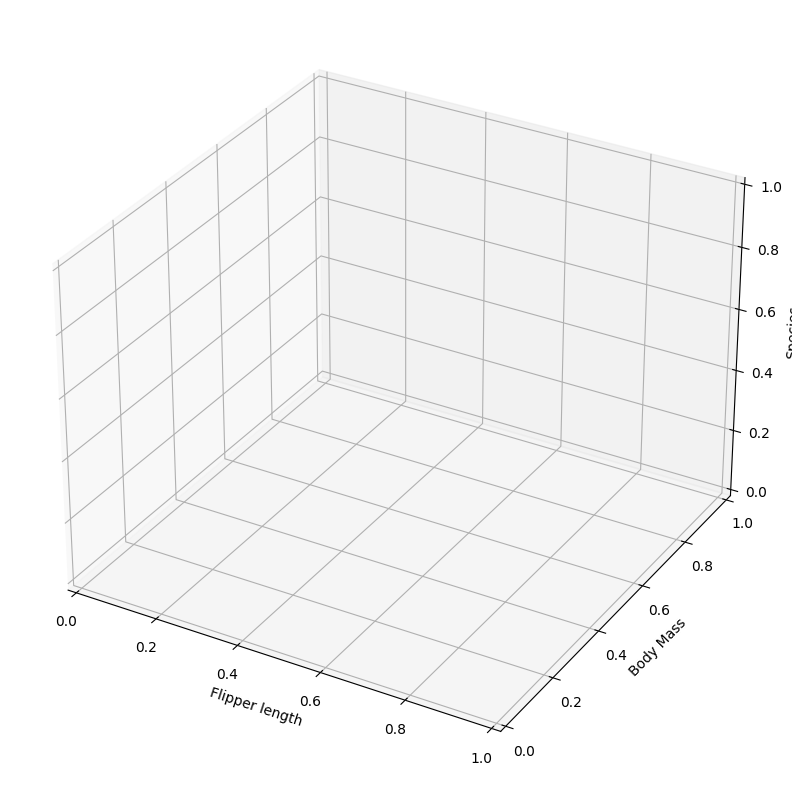

In [82]:
fig = pl.figure(figsize=(10, 10)) # создаем картинку
ax = pl.axes(projection="3d") # устанавливаем проекцию

# помещаем точки на график
#ax.scatter( df["Flipper Length (mm)"], df["Body Mass (g)"], y, s=50)

# называем оси
ax.set_xlabel("Flipper length")
ax.set_ylabel("Body Mass")
ax.set_zlabel("Species")

# отображаем картинку
#pl.show()

In the Titanic dataset your y is the column **Survived**

### 3.2 Train-Test split

In [83]:
# Import train-test-split
from sklearn.model_selection import train_test_split

In [84]:
# The function train_test_split() randomly separate the data. 
# If you want controll the randomness you set the random_state 
# to a value
Xtrain, Xtest, ytrain, ytest = \
train_test_split(X, y, test_size=0.2,random_state=34)

In [85]:
# Always check the shape of your train and test arrays to check if this was done correctly
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((266, 2), (67, 2), (266,), (67,))

In [86]:
Xtest

,Flipper Length (mm),Body Mass (g)
27,188.0,3300.0
123,210.0,4000.0
94,192.0,3725.0
81,189.0,3500.0
209,207.0,4000.0
...,...,...
127,199.0,4475.0
197,201.0,3950.0
315,228.0,5500.0
208,195.0,3650.0


<hr style="border:2px solid black">

## 4. Explore the Data

Done extensively last week, some ideas:
-  create plots
- `sns.pairplot()`
- `df.describe()`
- `df.info()`
- check/plot correlations etc etc

This is only done on the training data!!!. That means you have two options:
* merge your `X_train` and `y_train` from the previous step into `df_train`
* run `train_test_split()` on full dataframe with same test size and random state

<hr style="border:2px solid black">

In [87]:
import seaborn as sns

In [88]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 179 to 122
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Flipper Length (mm)  266 non-null    float64
 1   Body Mass (g)        266 non-null    float64
dtypes: float64(2)
memory usage: 6.2 KB


## 5. Feature Engineering

- All Tuesday we'll be talking about this
    - e.g. Lots of models cannot deal with missing values
    - e.g. Some models cannot deal with categorical data

<hr style="border:2px solid black">

## 6. Train Model
### 6.1 Have a baseline model 

In [89]:
from sklearn.dummy import DummyClassifier

Instantiate the model

In [90]:
# The Dummy Classifier takes a look at all your labels. 
# Counts which one is the most frequent. 
# Will use that label as the resulting prediction.
dummy_clf = DummyClassifier(strategy='most_frequent')

In [91]:
dummy_clf.fit(Xtrain,ytrain)
dummy_clf

DummyClassifier(strategy='most_frequent')

### 6.2 Train other models
+ the following are the classification models we are going to learn this week:
    + Logistic Regression (Mo afternoon)
    + Decision Tree (Wed afternoon)
    + Random Forest (Thu morning)
    + Support Vector Machines (Thu afternoon)

<hr style="border:2px solid black">

## 7. Optimize 
* Cross-validation next week
* Hyperparameter optimization next week

<hr style="border:2px solid black">

## 8. Evaluate model 

What is the score?
- In classification models, the in-built `.score` method will return the `accuracy` (:= percentage of correctly calssified labels)

On Wed morning:
+ other metrics to evaluate a classifier

In [92]:
# score on your training data
round(dummy_clf.score(Xtrain, ytrain),3)

0.459

In [93]:
pd.Series(ytrain).value_counts(normalize=True).round(3)

Adelie       0.459
Gentoo       0.353
Chinstrap    0.188
Name: Species, dtype: float64

In [94]:
# score on your test data
round(dummy_clf.score(Xtest, ytest),3)

0.358

In [96]:
pd.Series(ytest).value_counts(normalize=True).round(3)

Gentoo       0.373
Adelie       0.358
Chinstrap    0.269
Name: Species, dtype: float64

<hr style="border:2px solid black">

## 9. Make predictions

In [99]:
dummy_clf.predict(Xtest)

array(['Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie'], dtype='<U6')

<hr style="border:2px solid black">

## 10. Deploy the model 

We will talk about model deployment towards the end of the bootcamp.

<hr style="border:2px solid black">

### Next Step: Project Milestone 1


[**Course material 2.1**](https://spiced.space/naive-bayleaves/ds-course/chapters/project_titanic/ml_fundamentals/README.html)

Download the data and do the exploratory data analysis as described in Project Milestone 1.

**Note:** train.csv in 2.1 is actually your full data set for the week. You need to split it to **train and validation**.

### Get the data

In [101]:
full_data = pd.read_csv("../data/train.csv")


test_for_kaggle = pd.read_csv("../data/test.csv")

In [102]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
test_for_kaggle.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [127]:
X = full_data.drop(['Survived', 'Name'], axis=1)
y = full_data['Survived']

In [126]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,male,26.0,0,0,111369,30.0000,C148,C


In [130]:
Xtrain, Xtest, ytrain, ytest = \
train_test_split(X, y, test_size=0.2,random_state=34)

### Train-Validation split
Use the train_test_split function()
+ Xtrain, Xval, ytrain, yval = ...

In [132]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((712, 10), (179, 10), (712,), (179,))

### Exploratory data analysis

In [193]:
xt_count = full_data.groupby(['Sex','Pclass','Survived']).agg({'Survived':'count', 'Age':'mean'})
xt_count

Survived        Age
Sex    Pclass Survived                     
female 1      0                3  25.666667
              1               91  34.939024
       2      0                6  36.000000
              1               70  28.080882
       3      0               72  23.818182
              1               72  19.329787
male   1      0               77  44.581967
              1               45  36.248000
       2      0               91  33.369048
              1               17  16.022000
       3      0              300  27.255814
              1               47  22.274211

In [194]:
xt_count = xt_count.rename({'Survived':"srv"}, axis='columns')
xt_count = xt_count.reset_index()
xt_count.columns

Index(['Sex', 'Pclass', 'Survived', 'srv', 'Age'], dtype='object')

In [197]:
import plotly.express as px
sum = xt_count['srv'].sum()
xt_count['percent'] = xt_count['srv']/sum
xt_count

,Sex,Pclass,Survived,srv,Age,percent
0,female,1,0,3,25.666667,0.003367
1,female,1,1,91,34.939024,0.102132
2,female,2,0,6,36.000000,0.006734
3,female,2,1,70,28.080882,0.078563
4,female,3,0,72,23.818182,0.080808
5,female,3,1,72,19.329787,0.080808
6,male,1,0,77,44.581967,0.086420
7,male,1,1,45,36.248000,0.050505
8,male,2,0,91,33.369048,0.102132
9,male,2,1,17,16.022000,0.019080


In [214]:
fig = px.histogram(xt_count[xt_count['Sex'] == 'female'] , x='Pclass', y='percent', color='Survived', barmode='group',
             height=400)

fig.show()


In [220]:
fig = px.histogram(xt_count[xt_count['Sex'] == 'male'] , x='Pclass', y='percent', color='Survived', barmode='group',
             height=400)

fig.show()

<Axes: xlabel='Pclass', ylabel='percent'>

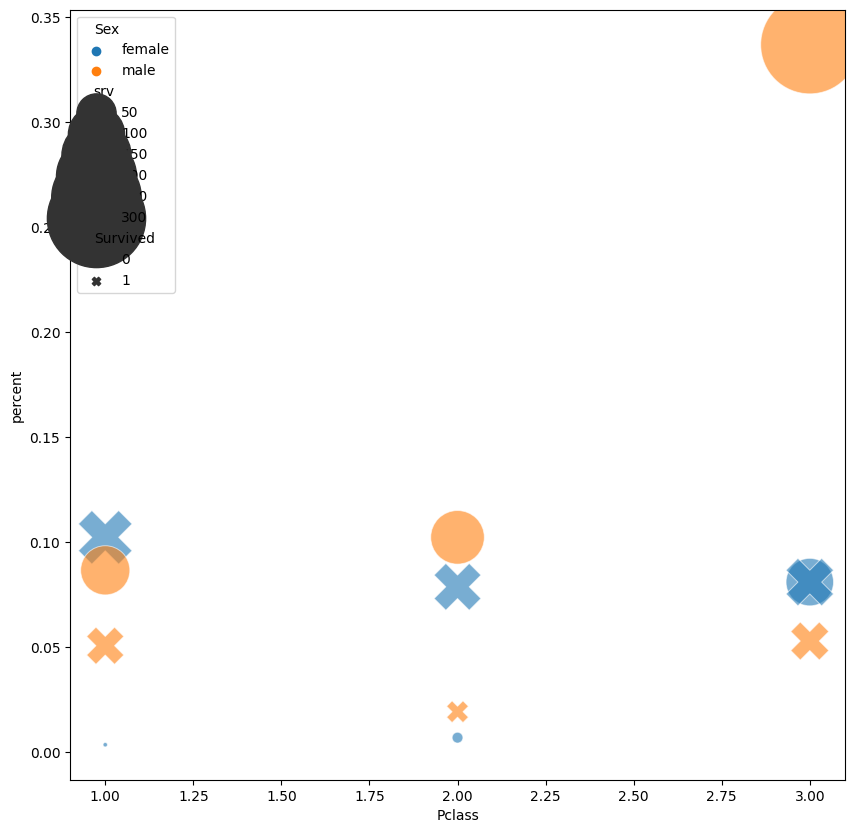

In [221]:
fig = pl.figure(figsize=(10,10))
sns.scatterplot(x='Pclass', y='percent', style='Survived', hue='Sex', size='srv', legend='brief', sizes=(10, 5000),
                data=xt_count, alpha=0.6)
